# Personal Key Indicators of Heart Disease

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

# Business Understanding

In [2]:
ds=pd.read_csv("heart_2020_cleaned.csv")
ds.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
ds.tail(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319785,No,31.93,No,Yes,No,0.0,0.0,No,Male,65-69,Hispanic,No,Yes,Good,7.0,No,No,No
319786,Yes,33.20,Yes,No,No,0.0,0.0,No,Female,60-64,Hispanic,Yes,Yes,Very good,8.0,Yes,No,No
319787,No,36.54,No,No,No,7.0,0.0,No,Male,30-34,Hispanic,No,No,Good,9.0,No,No,No
319788,No,23.38,No,No,No,0.0,0.0,No,Female,60-64,Hispanic,No,Yes,Excellent,6.0,No,No,No
319789,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


# Data Understanding

In [4]:
ds.shape

(319795, 18)

# Data Set Understanding

In [5]:
ds.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
ds.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [8]:
ds.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [9]:
ds["HeartDisease"].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
ds["HeartDisease"].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [11]:
ds["BMI"].unique()

array([16.6 , 20.34, 26.58, ..., 62.42, 51.46, 46.56])

In [12]:
ds["BMI"].value_counts()

26.63    3762
27.46    2767
27.44    2723
24.41    2696
27.12    2525
         ... 
59.85       1
50.59       1
92.53       1
62.95       1
46.56       1
Name: BMI, Length: 3604, dtype: int64

In [13]:
ds["Smoking"].value_counts()

No     187887
Yes    131908
Name: Smoking, dtype: int64

In [14]:
ds["Smoking"].unique()

array(['Yes', 'No'], dtype=object)

In [15]:
ds["AlcoholDrinking"].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
ds["AlcoholDrinking"].value_counts()

No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64

In [17]:
ds["Sex"].unique()

array(['Female', 'Male'], dtype=object)

In [18]:
ds["Sex"].value_counts()

Female    167805
Male      151990
Name: Sex, dtype: int64

In [19]:
ds["DiffWalking"].value_counts()

No     275385
Yes     44410
Name: DiffWalking, dtype: int64

In [20]:
ds["DiffWalking"].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
ds["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [22]:
ds["AgeCategory"].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [23]:
ds["Race"].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [24]:
ds["Race"].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [25]:
ds["Diabetic"].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [26]:
ds["Diabetic"].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [27]:
ds["PhysicalActivity"].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
ds["PhysicalActivity"].value_counts()

Yes    247957
No      71838
Name: PhysicalActivity, dtype: int64

In [29]:
ds["GenHealth"].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [30]:
ds["GenHealth"].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [31]:
ds["Asthma"].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
ds["KidneyDisease"].unique()

array(['No', 'Yes'], dtype=object)

In [33]:
ds["SkinCancer"].unique()

array(['Yes', 'No'], dtype=object)

In [34]:
#sperate the contiouns and categorical data 
continous=["BMI","PhysicalHealth","MentalHealth","SleepTime"]
catgorical=["HeartDisease","Smoking","AlcoholDrinking","Stroke","DiffWalking","Sex","AgeCategory","Race","Diabetic","PhysicalActivity","GenHealth","Asthma","KidneyDisease","SkinCancer"]

# data preparation #EDA base line 

In [35]:
ds.describe(include="all")

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [36]:
ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


# contiouns data on histogram 

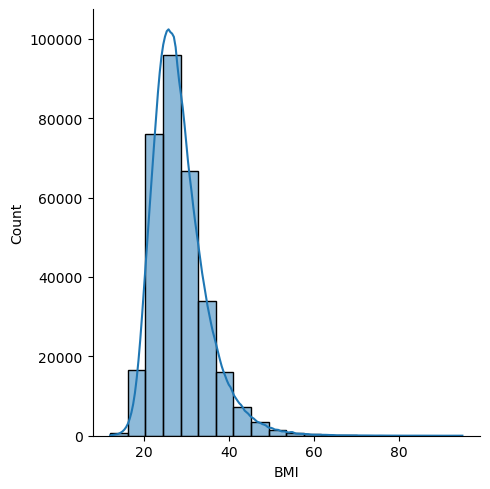

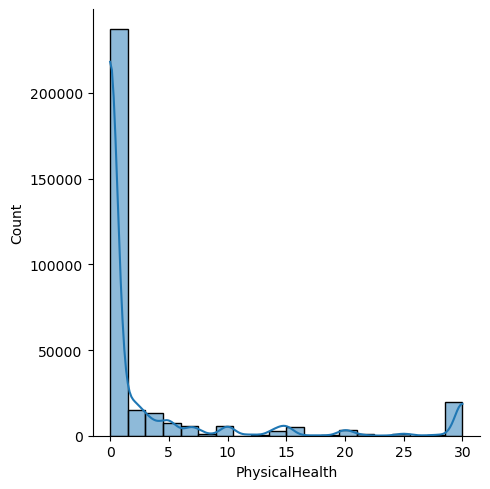

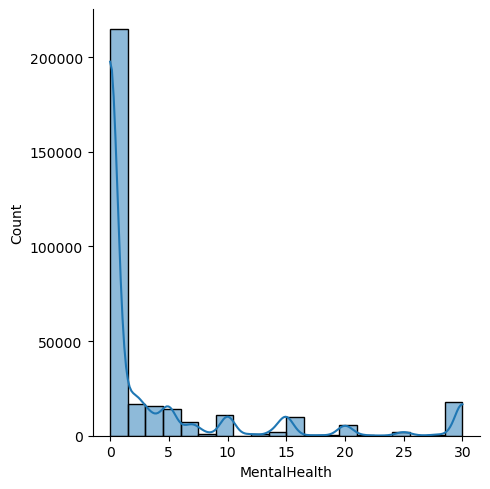

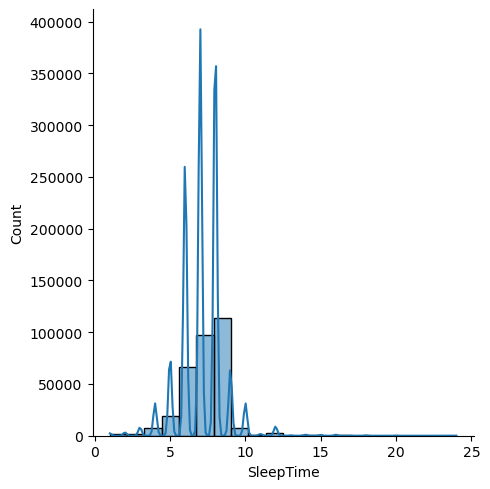

In [37]:
for i in range(len(continous)):
    sns.displot(x=continous[i],data=ds,kde=True,bins=20)
    plt.show()

In [38]:
ds["BMI"].skew()

1.3324306428979513

In [39]:
ds["PhysicalHealth"].skew()

2.6039732622480822

In [40]:
ds["MentalHealth"].skew()

2.331111549136165

In [41]:
ds["SleepTime"].skew()

0.6790346208011537

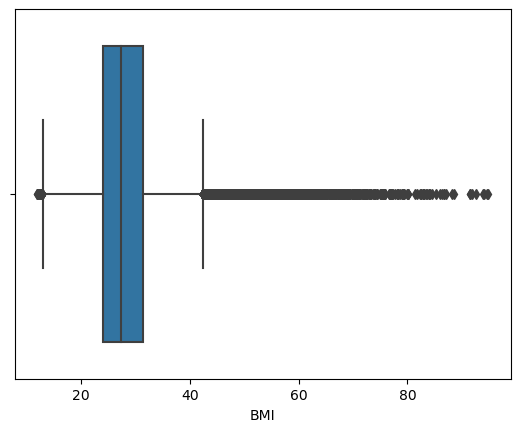

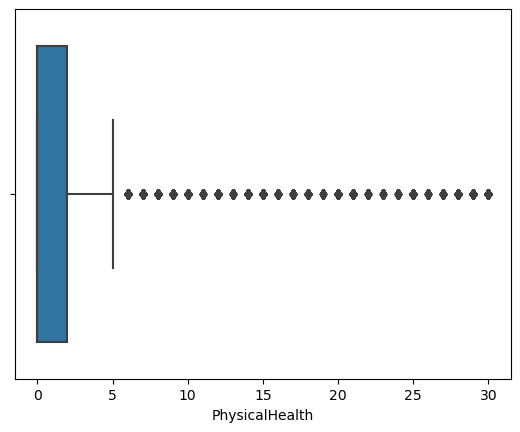

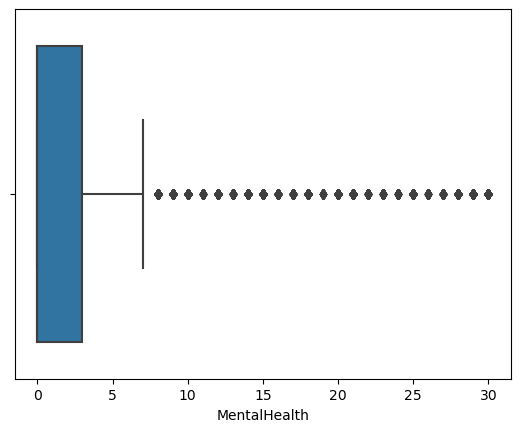

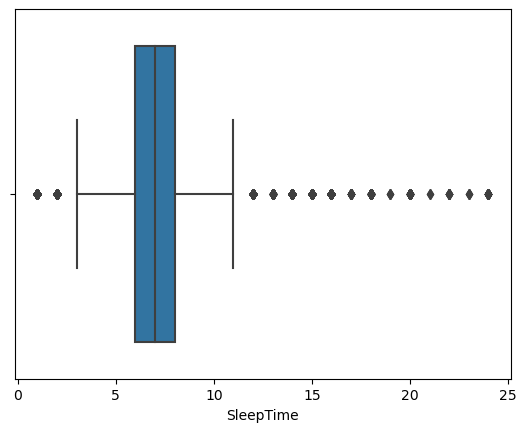

In [42]:
for i in range(len(continous)):
    sns.boxplot(x=continous[i],data=ds)
    plt.show()

In [43]:
#chuecking the misssing value 
ds.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

# data transformation / what will reqired for defult model

In [44]:
#pip install feature_engine

# treating the outlier

In [45]:
#treating the outlier 
from feature_engine.outliers import Winsorizer
win= Winsorizer(capping_method="iqr",tail="both",fold=1.5,variables= ["BMI"])
ds["BMI"]= win.fit_transform(ds[["BMI"]])

In [46]:
print(win.left_tail_caps_,win.right_tail_caps_)

{'BMI': 12.945} {'BMI': 42.505}


In [47]:
#treating the outlier 
from feature_engine.outliers import Winsorizer
win = Winsorizer(capping_method="iqr",tail="both",fold=1.5,variables= ["PhysicalHealth"])
ds["PhysicalHealth"]= win.fit_transform(ds[["PhysicalHealth"]])

In [48]:
print(win.left_tail_caps_,win.right_tail_caps_)

{'PhysicalHealth': -3.0} {'PhysicalHealth': 5.0}


In [49]:
#treating the outlier 
from feature_engine.outliers import Winsorizer
win = Winsorizer(capping_method="iqr",tail="both",fold=1.5,variables= ["MentalHealth"])
ds["MentalHealth"]= win.fit_transform(ds[["MentalHealth"]])

In [50]:
print(win.left_tail_caps_,win.right_tail_caps_)

{'MentalHealth': -4.5} {'MentalHealth': 7.5}


In [51]:
#treating the outlier 
from feature_engine.outliers import Winsorizer
win = Winsorizer(capping_method="iqr",tail="both",fold=1.5,variables= ["SleepTime"])
ds["SleepTime"]= win.fit_transform(ds[["SleepTime"]])

In [52]:
print(win.left_tail_caps_,win.right_tail_caps_)

{'SleepTime': 3.0} {'SleepTime': 11.0}


# treating the skewnesss

In [53]:
#ds["BMI_o"]=ds["BMI"]**(1/49.9)   #root transformation 
#ds["BMI_o"].skew()

##logarithms transformation 
#ds["BMI_o"]=np.log(ds["BMI"]+0.01)
#ds["BMI_o"].skew()

#reciprocal transformation
#ds["BMI_o"]=1/(ds["BMI"]+0.01)
#ds["BMI_o"].skew()

In [54]:
#pip install scipy

In [55]:
#boxcox
from scipy import stats

In [56]:
#transformation training data & save lambda value 
ds["BMI_o"],param=stats.boxcox(ds.BMI+0.01)
print("lambda=",param)
ds["BMI_o"].skew()

lambda= -0.2680532011354094


0.004183040470886472

In [57]:
ds["PhysicalHealth_o"]=ds["PhysicalHealth"]**(1/90.99222222229)   #root transformation 
ds["PhysicalHealth_o"].skew()

0.9179965077508623

In [58]:
#transformation training data & save lambda value 
ds["MentalHealth_o"],param=stats.boxcox(ds.MentalHealth+0.01)
print("lambda=",param)
ds["MentalHealth_o"].skew()

lambda= -0.2978839485005269


0.6020347188719569

In [59]:
#transformation training data & save lambda value 
ds["SleepTime_o"],param=stats.boxcox(ds.SleepTime+0.01)
print("lambda=",param)
ds["SleepTime_o"].skew()

lambda= 1.2533393981328176


0.06325635057594281

# after skewness drop before column

In [60]:
#after skewness drop before column
ds.drop(columns=["MentalHealth","SleepTime","PhysicalHealth","BMI"],inplace=True)
ds.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI_o,PhysicalHealth_o,MentalHealth_o,SleepTime_o
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes,1.974075,1.012147,1.515758,5.214776
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No,2.067136,0.000000,-9.877892,8.362291
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No,2.182219,1.017845,1.515758,10.028668
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes,2.142982,0.000000,-9.877892,6.755234
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No,2.134080,1.017845,-9.877892,10.028668


In [61]:
#save the file in csv 
ds.to_csv("EDAwith data preprocessing.csv",index=False)